In [1]:
import pandas as pd 
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import plotly.express as px

In [2]:
import sys
print(sys.executable)


C:\Users\ssson\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe


In [3]:
data = pd.read_csv("./datasets/Iris.csv", index_col='Id')
data.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
6,5.4,3.9,1.7,0.4,Iris-setosa
7,4.6,3.4,1.4,0.3,Iris-setosa
8,5.0,3.4,1.5,0.2,Iris-setosa
9,4.4,2.9,1.4,0.2,Iris-setosa


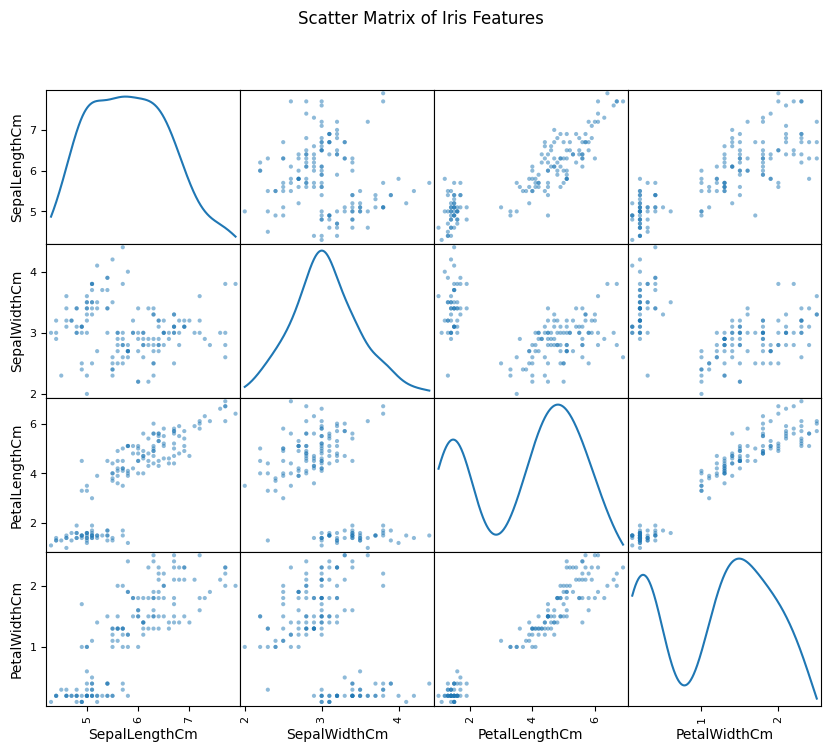

In [4]:
pd.plotting.scatter_matrix(data.drop("Species", axis=1), figsize=(10, 8), diagonal='kde')
plt.suptitle("Scatter Matrix of Iris Features")
plt.show()

In [5]:
X = data.drop(['Species', 'SepalWidthCm', 'SepalLengthCm'], axis=1)


In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

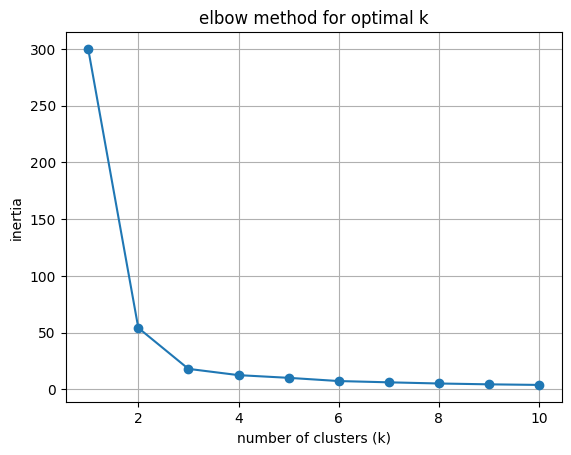

In [7]:
sse = []
range_n = range(1, 11)
for k in range_n:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    sse.append(km.inertia_)

plt.plot(range_n, sse, marker='o')
plt.xlabel("number of clusters (k)")
plt.ylabel("inertia")
plt.title("elbow method for optimal k")
plt.grid(True)
plt.show()

In [8]:
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(X_scaled)

In [ ]:
fig1 = px.scatter(data, x='PetalLengthCm', y='PetalWidthCm', color='Species',
                  title="actual species")
fig1.show()

fig2 = px.scatter(data, x='PetalLengthCm', y='PetalWidthCm', color=data['Cluster'].astype(str),
                  title="kmeans clustering")
fig2.show()